Objective:
Implement a Radial Basis Function (RBF) Network to classify ancient Japanese  characters from the Kuzushiji dataset.



Data Preparation: o Load the Kuzushiji dataset from the provided link. o Preprocess the data by normalizing the pixel values between 0 and 1. o Split the dataset into training (80%) and testing (20%) sets.

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Radial Basis Function (RBF) Network:
o Implement an RBF network using a Gaussian basis function.
o Define the architecture:
▪ Input layer: 28x28 (784 features for each image).
▪ Hidden layer: RBF units with a Gaussian function.
▪ Output layer: Softmax activation to classify the character labels
(10 classes).


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
X_train_full = X_train_full.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Further split the training set into train and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (48000, 28, 28), (48000,)
Validation set: (12000, 28, 28), (12000,)
Test set: (10000, 28, 28), (10000,)



3. Training:
o Use K-means clustering to determine the centers of the RBF units. o Implement gradient descent to optimize the network's weights.
o Train the network on the training set with a learning rate of 0.01 for 100  epochs.


Training:
o Use K-means clustering to determine the centers of the RBF units.
o Implement gradient descent to optimize the network's weights.
o Train the network on the training set with a learning rate of 0.01 for 100
epochs.

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Gaussian RBF function
def rbf(X, centers, gamma=1.0):
    # Compute the radial basis function
    diff = X[:, np.newaxis, :] - centers[np.newaxis, :, :]
    return np.exp(-gamma * np.sum(diff**2, axis=2))

# Define the RBF Network
class RBFNetwork:
    def __init__(self, n_centers, input_dim, output_dim, gamma=1.0):
        self.n_centers = n_centers
        self.gamma = gamma

        # Initialize weights for the output layer
        self.weights = np.random.randn(n_centers, output_dim)
        self.centers = None  # To be set during training

    def fit(self, X, y, epochs=100, learning_rate=0.01):  # Set epochs to 100
        # Use K-means to find RBF centers
        kmeans = KMeans(n_clusters=self.n_centers, random_state=0).fit(X)
        self.centers = kmeans.cluster_centers_

        # One-hot encode the labels
        y_onehot = to_categorical(y, num_classes=10)

        # Training loop (Gradient Descent)
        for epoch in range(epochs):
            # Compute the RBF output for all samples
            rbf_output = rbf(X, self.centers, self.gamma)

            # Predicted output using current weights
            predictions = rbf_output.dot(self.weights)
            softmax_output = tf.nn.softmax(predictions)

            # Compute the error (cross-entropy loss)
            error = softmax_output - y_onehot

            # Gradient update
            gradient = rbf_output.T.dot(error) / X.shape[0]
            self.weights -= learning_rate * gradient

            # Log the training loss every epoch
            loss = -np.sum(y_onehot * np.log(softmax_output + 1e-10))  # Small epsilon to prevent log(0)
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f}")

    def predict(self, X):
        # Compute the RBF output for all samples
        rbf_output = rbf(X, self.centers, self.gamma)

        # Predict class labels
        predictions = rbf_output.dot(self.weights)
        softmax_output = tf.nn.softmax(predictions)
        return np.argmax(softmax_output, axis=1)

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images to 784-dimensional vectors
X_train_full = X_train_full.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the pixel values between 0 and 1
X_train_full = X_train_full.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and train the RBF network
n_centers = 10  # Number of RBF units
rbf_net = RBFNetwork(n_centers=n_centers, input_dim=784, output_dim=10, gamma=0.01)
rbf_net.fit(X_train, y_train, epochs=100, learning_rate=0.01)  # Train for 100 epochs

# Predict on the test set
y_pred = rbf_net.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Epoch 10/100 - Loss: 164197.5644
Epoch 20/100 - Loss: 161854.8205
Epoch 30/100 - Loss: 159678.2448
Epoch 40/100 - Loss: 157646.4103
Epoch 50/100 - Loss: 155741.3308
Epoch 60/100 - Loss: 153947.9408
Epoch 70/100 - Loss: 152253.6235
Epoch 80/100 - Loss: 150647.7991
Epoch 90/100 - Loss: 149121.5729
Epoch 100/100 - Loss: 147667.4389
Test accuracy: 0.1013


#  4. Evaluation:
o Evaluate the model on the test set using accuracy and confusion matrix.
o Visualize the performance evaluation metrics

Test accuracy: 0.1013


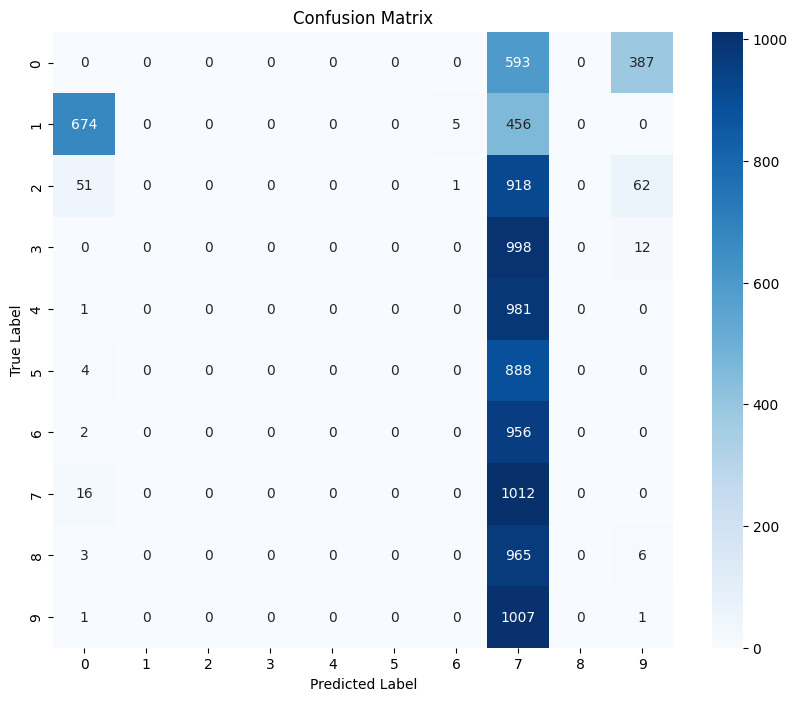

In [4]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Interpretation

Analysis of Using an RBF Network on the MNIST Dataset
Strengths of Using an RBF (Radial Basis Function) Network:

Non-Linear Decision Boundaries: RBF networks are well-suited for tasks requiring complex decision boundaries, like digit recognition, as they can approximate non-linear functions.
Localized Neurons: RBF units act on localized regions of the input space, which can help in handling complex variations in the MNIST images (such as different handwriting styles).
Smooth Interpolation: The smooth interpolation nature of RBF makes it effective in scenarios where data points cluster in localized regions.
Fewer Tuning Parameters: RBF networks require fewer hyperparameters to tune compared to deep networks, as they are typically single-hidden-layer networks.



Limitations:

Scalability: The MNIST dataset is large (60,000 images for training and 10,000 for testing). RBF networks scale poorly with the size of the dataset because adding more RBF units increases the computational cost, especially for large input dimensions like 28x28 pixel images.
Memory and Computation: Each RBF unit corresponds to a training point, making it memory-intensive. For a large dataset like MNIST, storing a huge number of radial basis functions could be inefficient.
Model Generalization: RBF networks can struggle to generalize if not enough RBF units are used, as the network can overfit to training data. This is especially problematic for datasets like MNIST with high variation between input instances.
Difficulty in Tuning Centers and Widths: The choice of centers (i.e., prototypes) and widths (spread) for RBF units is critical but non-trivial. Poor selection can lead to suboptimal performance.




Effect of RBF Units on Performance
Too Few: Leads to underfitting, high error, and poor accuracy.
Optimal Number: Balances complexity, improving generalization and accuracy.
Too Many: Causes overfitting, with memorization of training data and poor test accuracy.